# INFO 5307 Project Part 3

## Customer Churn Prediction for Banking and Finance

### Sowmya Devi Selvan

## Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings  
warnings.filterwarnings('ignore') 

## Importing the data set

In [39]:
df = pd.read_csv("Desktop/INFO 5307 Final_Project/Bank Customer Churn Prediction.csv")

In [40]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preparation and Cleaning

In [41]:
# Number of Rows and Columns in the Data frame
df.shape

(10000, 12)

In [42]:
# Information about the data frame including data types, number of entries, columns etc.,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [43]:
# Statistical values for the numerical columns in the data frame
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
# Number of null values for all columns across the data frame
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [45]:
# Finding the number of unique values for every column
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [46]:
# Finding the number of unique credit scores
df.credit_score.unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [47]:
# Identifying unique countries
df.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [48]:
# Unique genders in the data set
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [49]:
# Unique age entries in the data set
df.age.unique() 

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [50]:
# No of years customers are with the bank
df.tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [51]:
# Number of bank products in the data set
df.products_number.unique()            

array([1, 3, 2, 4], dtype=int64)

In [52]:
# The number of unique entries for credit card holder or not
df.credit_card.unique()   

array([1, 0], dtype=int64)

In [53]:
# Idenifying unique entries for active member or not
df.active_member.unique()

array([1, 0], dtype=int64)

In [54]:
# Entries that are unique for customer churned or not
df.churn.unique()

array([1, 0], dtype=int64)

In [55]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [56]:
# Checking for the number of churned and not churned counts of customers
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [57]:
# Changing categorical values into numerical
df['gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df['country'].replace(['France','Germany','Spain'],[0,1,2],inplace=True)

In [58]:
# Dropping customer_id as it is not needed for Analysis/modeling
df = df.drop('customer_id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [59]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


## Exploratory Data Analysis and Visualization

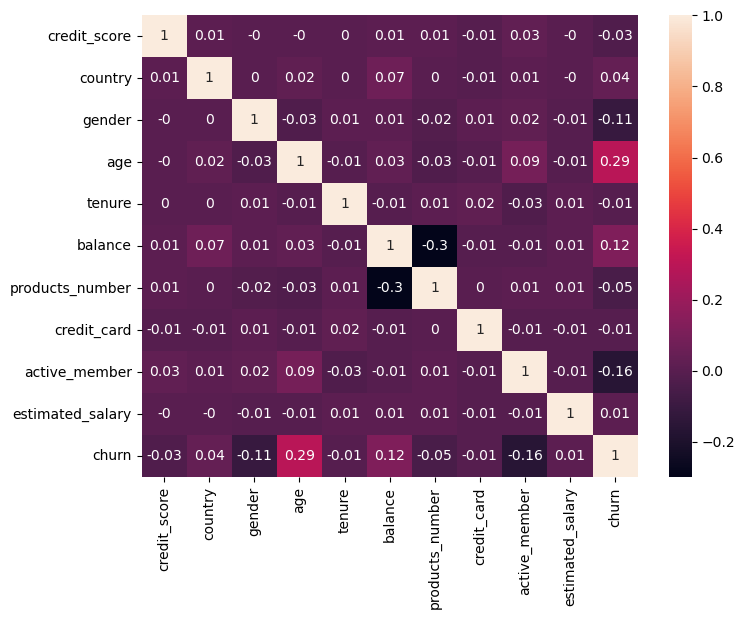

In [60]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr().round(2), annot = True);


In [61]:
# Correlation coefficients arranged in ascending order
(df.corr()['churn'].abs().sort_values(ascending=False)).round(2)

churn               1.00
age                 0.29
active_member       0.16
balance             0.12
gender              0.11
products_number     0.05
country             0.04
credit_score        0.03
tenure              0.01
estimated_salary    0.01
credit_card         0.01
Name: churn, dtype: float64

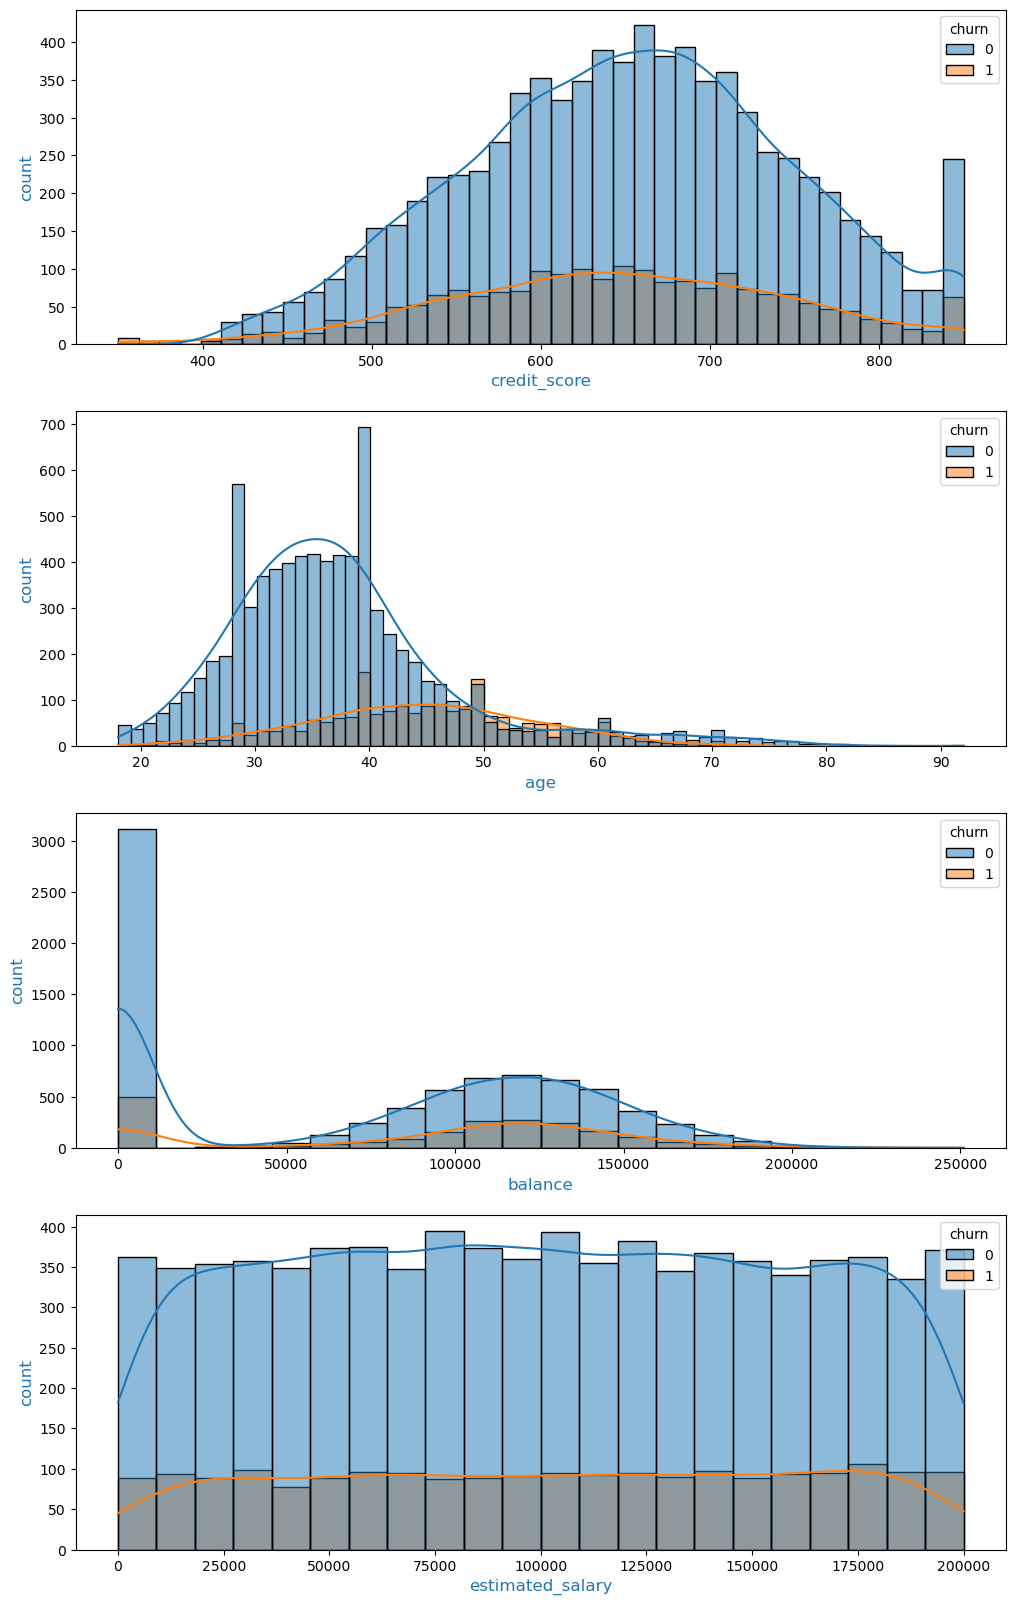

In [62]:
# Histogram Plots of various parameters against Churn
colors=sns.color_palette("tab20")
plt.figure(figsize=(12,20))

plt.subplot(4,1,1)
sns.histplot(df, x='credit_score', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('credit_score', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,2)
sns.histplot(df, x='age', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,3)
sns.histplot(df, x='balance', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('balance', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,4)
sns.histplot(df, x='estimated_salary', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.show()


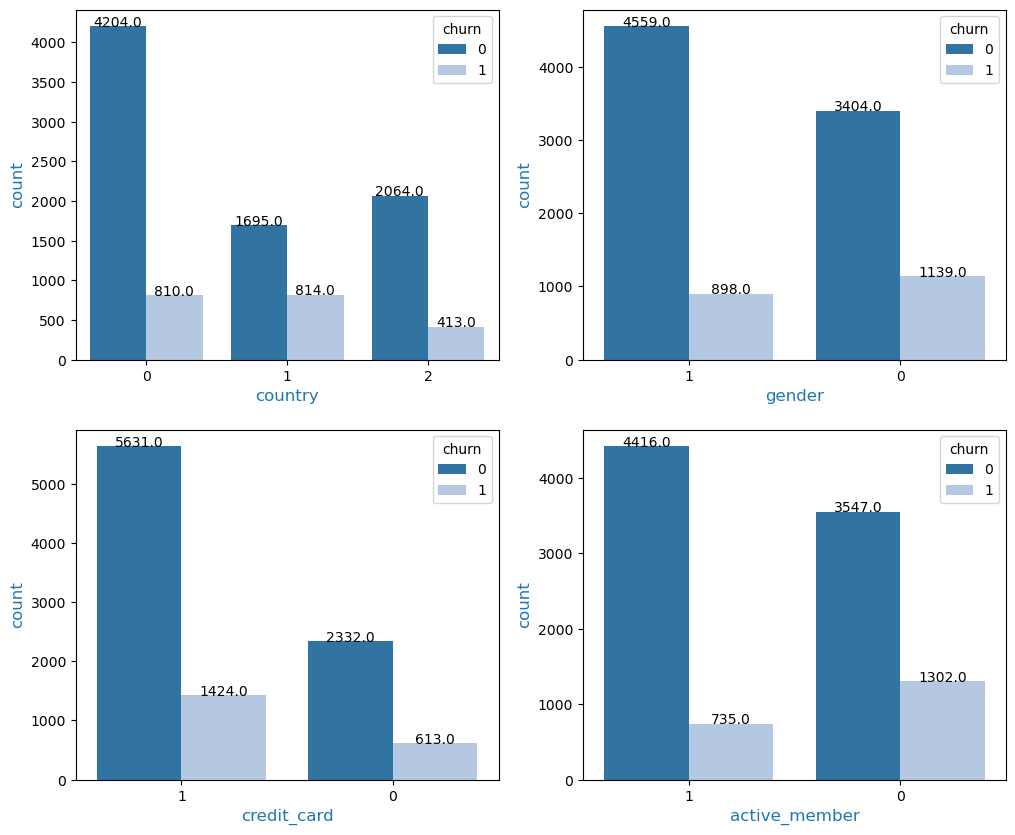

In [63]:
# Count plot of various parameters against churn
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
cplot = sns.countplot(data=df, x='country', hue='churn', order=df['country'].value_counts().index, palette=colors)
plt.xlabel('country', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,2)
cplot = sns.countplot(data=df, x='gender', hue='churn', order=df['gender'].value_counts().index, palette=colors)
plt.xlabel('gender', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,3)
cplot = sns.countplot(data=df, x='credit_card', hue='churn', order=df['credit_card'].value_counts().index, palette=colors)
plt.xlabel('credit_card', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,4)
cplot = sns.countplot(data=df, x='active_member', hue='churn', order=df['active_member'].value_counts().index, palette=colors)
plt.xlabel('active_member', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

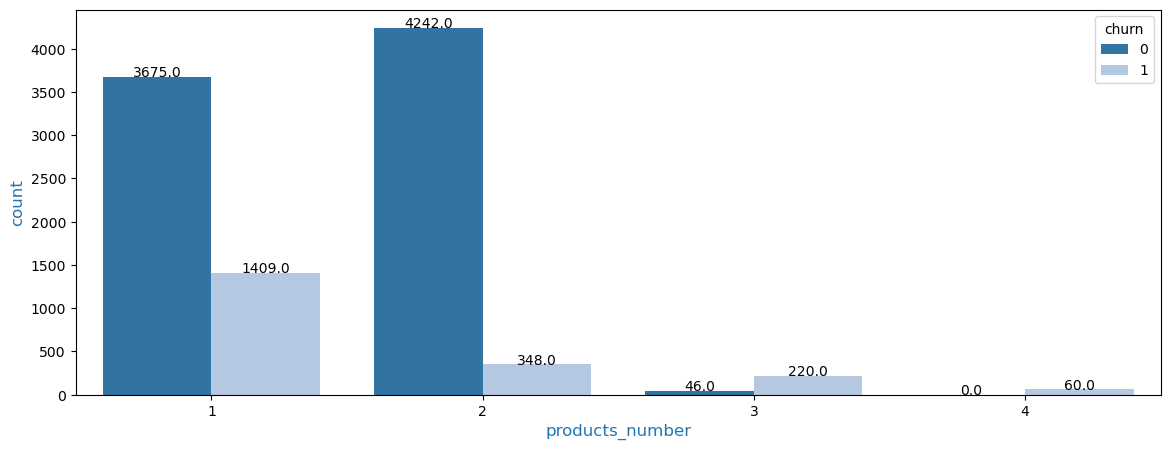

In [64]:
#Count plot of product number against churn
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=df, x='products_number', hue='churn', palette=colors)
plt.xlabel('products_number', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

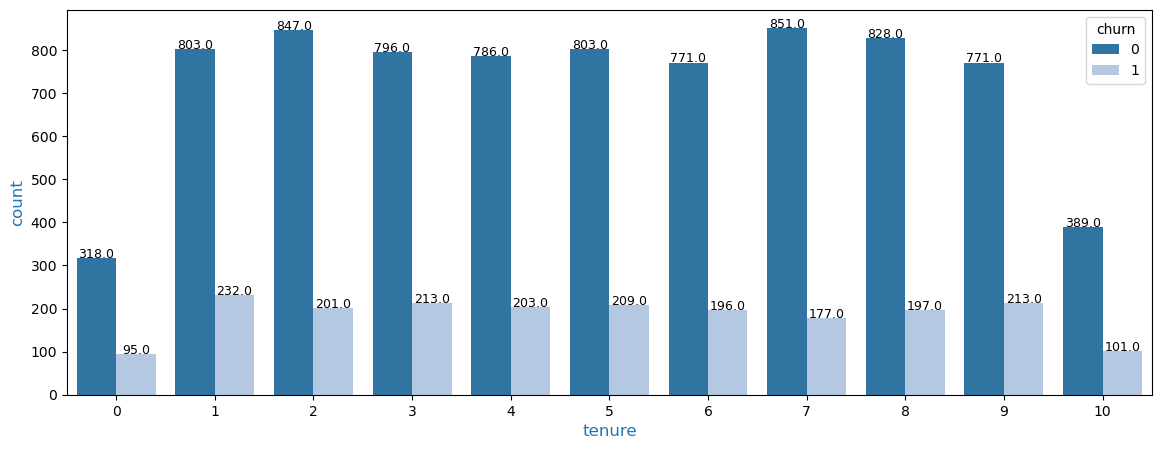

In [65]:
# Count plot of tenure against churn
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=df, x='tenure', hue='churn', palette=colors)
plt.xlabel('tenure', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 9)

plt.show()

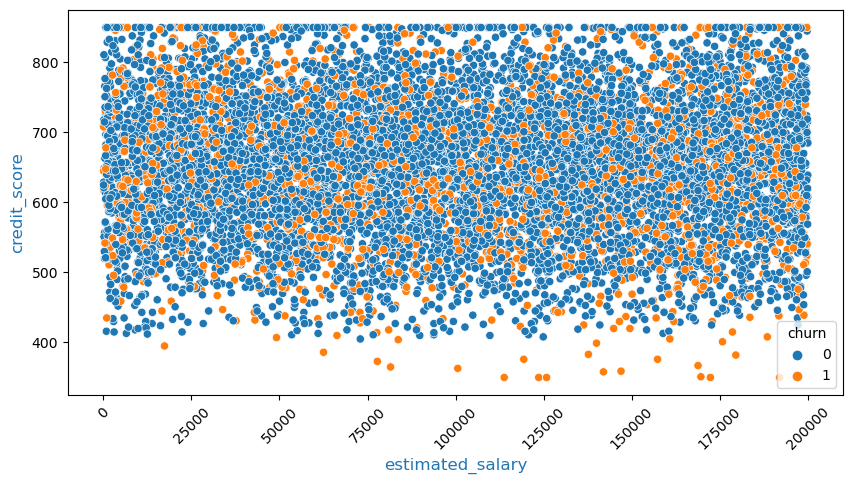

In [66]:
#Scatter plot of estimated salary vs credit score
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='estimated_salary', y='credit_score', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('credit_score', fontsize=12, color=colors[0])
plt.xticks(rotation=45)

plt.show()

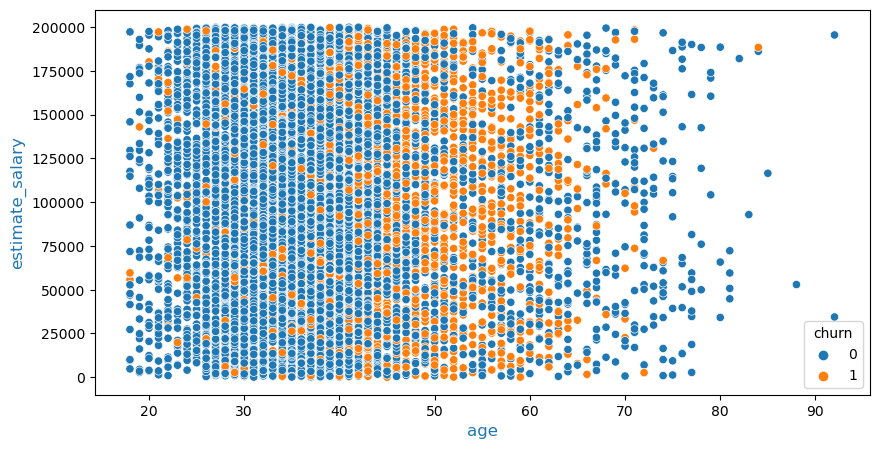

In [67]:
# Scatter plot of age and salary
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimate_salary', fontsize=12, color=colors[0])

plt.show()

In [68]:
# columns list in the data frame
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [69]:
#Assigning features to X and Y as X and Y are the input and target variable
X = df[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]

In [70]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [71]:
# Target Variable we will predict
Y = df['churn']

In [72]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

## Handling data imbalance using SMOTE

In [73]:
# Since there is imbalance in the data set trying to match the churn and not churned using SMOTE
X,Y = SMOTE().fit_resample(X,Y)
Y.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

In [74]:
#Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
print("X shape : ", X.shape)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y shape : ", Y.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X shape :  (15926, 10)
X_train shape :  (12740, 10)
X_test shape :  (3186, 10)
Y shape :  (15926,)
Y_train shape :  (12740,)
Y_test shape :  (3186,)


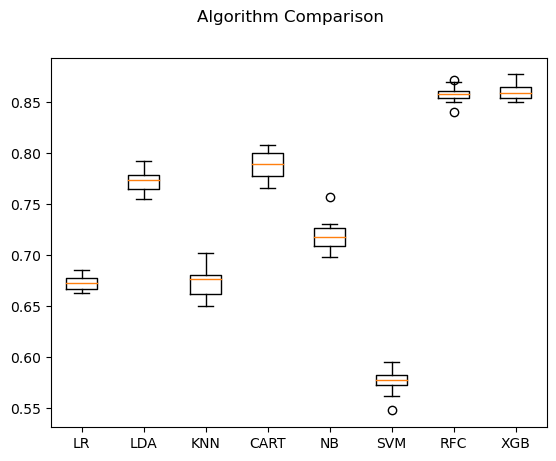

In [76]:
# Comparing various prediction models to find the one with the best accuracy
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Building

In [77]:
# Implementing Random forest classifier as it out performed the rest
rf = RandomForestClassifier(n_jobs=-1, verbose=2)

In [78]:
# Fitting the model with the training data set
rf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(n_jobs=-1, verbose=2)

In [79]:
# Identifying KPI's
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) ---> %s" % (f + 1, indices[f], importances[indices[f]], df.columns[indices[f]]))

Feature ranking:
1. feature 3 (0.233426) ---> age
2. feature 9 (0.122804) ---> estimated_salary
3. feature 5 (0.120629) ---> balance
4. feature 0 (0.113052) ---> credit_score
5. feature 8 (0.111833) ---> active_member
6. feature 6 (0.096979) ---> products_number
7. feature 4 (0.072676) ---> tenure
8. feature 2 (0.060035) ---> gender
9. feature 1 (0.048864) ---> country
10. feature 7 (0.019702) ---> credit_card


In [80]:
Y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [81]:
# Precision, Recall, F1 score, Support
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [82]:
# Predicting the accuracy 
prediction = rf.predict(X_test)
print('Accuracy score :',(accuracy_score(Y_test, prediction)).round(2))

Accuracy score : 0.86


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


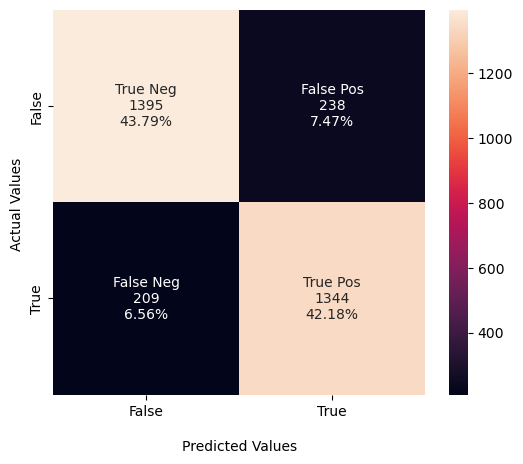

In [83]:
# Confusion Matrix
cf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


plt.figure(figsize=(6,5))
ax = sns.heatmap(cf_matrix, annot=labels, fmt='')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

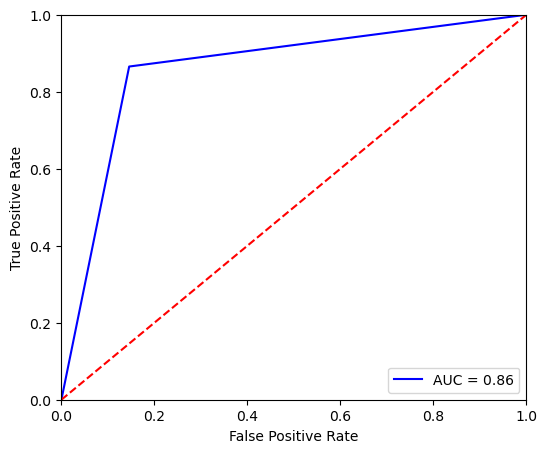

In [84]:
# AUC and ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
# Predicting churn for a sample input
sample = [[400, 1, 0, 50, 3, 500.00, 1, 1, 0, 200000.00]]
sample_df = pd.DataFrame(sample, columns=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance'	,'products_number' ,'credit_card',	'active_member'	,'estimated_salary'])
print("Sample input:- \n")
display(sample_df.style.set_properties(**{"border" : "1px solid"}))
print("\n\nPredicted value:- \n")
pred = rf.predict(sample_df)
if pred[0] == 1:
  print("Customer is likely to leave\n")
else:
  print("Customer is likely to stay\n")

Sample input:- 



,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,400,1,0,50,3,500.000000,1,1,0,200000.000000




Predicted value:- 

Customer is likely to leave



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
